# 1ª Lista de Exercícios
Aluno: Gustavo Schlieper Tessitore

In [7]:
from ortools.sat.python import cp_model
import numpy as np

# Questão 1

distancias = np.array([
    [290, 115, 355, 715, 810],
    [380, 340, 165, 380, 610],
    [505, 530, 285, 220, 450],
    [655, 450, 155, 240, 315],
    [1010, 840, 550, 305, 95],
    [1072, 1097, 747, 372, 333]
])

custo_de_transporte = distancias * 30

modelo = cp_model.CpModel()

inventario = {
    1: 10,
    2: 12,
    3: 20,
    4: 24,
    5: 18,
    6: 40
}

demanda = {
    1: 30,
    2: 15,
    3: 25,
    4: 33,
    5: 21
}

variaveis = np.array(
    [
        [
            modelo.NewIntVar(0, inventario[i], f'x{i}{j}')
            for j in range(1, 6)
        ]
        for i in range(1, 7)
    ]
)

for i in range(6):
    modelo.Add(
        sum(variaveis[i]) == inventario[i + 1]
    )

for j in range(5):
    modelo.Add(
        sum(
            [variaveis[i][j] for i in range(6)]
        ) <= demanda[j + 1]
    )

modelo.Minimize((custo_de_transporte * variaveis).sum())

solver = cp_model.CpSolver()
status = solver.Solve(modelo)

custo_minimo = solver.ObjectiveValue()
distribuicao = np.array([
    [solver.Value(variaveis[i][j]) for j in range(5)]
    for i in range(6)
])

resultado = f"""
Status: {status}
Custo mínimo: {custo_minimo}
Distribuição:
"""

print(resultado)
distribuicao


Status: 4
Custo mínimo: 1148340.0
Distribuição:



array([[ 0, 10,  0,  0,  0],
       [ 7,  5,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0],
       [ 0,  0,  0,  0, 18],
       [ 3,  0,  1, 33,  3]])

distancia_entre_1_e_3 = 101


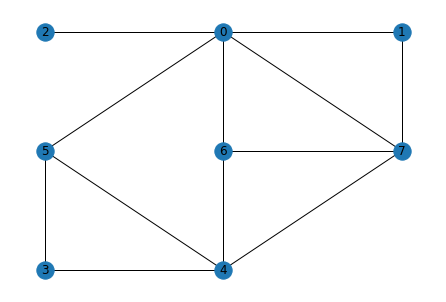

In [5]:
import networkx as nx

# Questão 2

nos = {
    0: (1, 2),
    1: (2, 2),
    2: (0, 2),
    3: (0, 0),
    4: (1, 0),
    5: (0, 1),
    6: (1, 1),
    7: (2, 1)
}


distancias = {
    (0, 2): 29,
    (0, 5): 60,
    (0, 6): 51,
    (1, 0): 32,
    (1, 7): 21,
    (5, 3): 18,
    (6, 4): 51,
    (7, 0): 31,
    (7, 6): 25,
    (7, 4): 46,
    (4, 3): 34,
    (4, 5): 40
}

grafo = nx.Graph()

for no, (x, y) in nos.items():
    grafo.add_node(no, pos=(x, y))

for no, distancia in distancias.items():
    grafo.add_edge(no[0], no[1], weight=distancia)

nx.draw(grafo, pos=nx.get_node_attributes(grafo, 'pos'), with_labels=True)

distancia_entre_1_e_3 = nx.dijkstra_path_length(grafo, 1, 3)
print(f"{distancia_entre_1_e_3 = }")

Questão 3
$$\max 2x_1 + 3x_2 \\  x_1 + 2x_2 \leq 3 \\ 6x_1 + 8x_2 \leq 15 \\ x_1,x_2 \in \mathbb{Z}_+$$

In [16]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

# Variáveis
x1 = solver.IntVar(0, solver.infinity(), 'x1')
x2 = solver.IntVar(0, solver.infinity(), 'x2')

# Função objetivo
solver.Maximize(2 * x1 + 3 * x2)

# Restrições
solver.Add(2 * x1 + 3 * x2 <= 3)
solver.Add(6 * x1 + 8 * x2 <= 15)

solver.Solve()

print(f"Valor da função objetivo = {solver.Objective().Value()}")
print(f"Valor de x1 = {x1.solution_value()}")
print(f"Valor de x2 = {x2.solution_value()}")

Valor da função objetivo = 3.0
Valor de x1 = 0.0
Valor de x2 = 1.0


In [10]:
from ortools.algorithms import pywrapknapsack_solver

# Questão 4

receita = [16, 22, 12, 8]
valor_investido = [[5, 7, 4, 3]]
total = [14]

# Solver
solver = pywrapknapsack_solver.KnapsackSolver(
    pywrapknapsack_solver.KnapsackSolver.
    KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'Investimento'
)
solver.Init(receita, valor_investido, total)
solucao = solver.Solve()
print(f"Valor investido = {solucao} milhões")
for i in range(len(receita)):
    if solver.BestSolutionContains(i):
        # print(f"{valor_investido[0][i]=}")
        print(f"Investiu {valor_investido[0][i]} milhões em {i+1}")

Valor investido = 42 milhões
Investiu 7 milhões em 2
Investiu 4 milhões em 3
Investiu 3 milhões em 4
